## Grafo Direcional (Completo)


VÉRTICES DO GRAFO: 313
ARESTAS DO GRAFO: 508
PESO (NUMÉRICO) DA ARESTA COM O MARQUINHOS: 2
PESO (INFORMAÇÃO) DA ARESTA COM O MARQUINHOS: [{'data': '1 jul', 'jogador': 'Marquinhos', 'valor': 'Não Informado', 'id': 11}, {'data': '9 jan', 'jogador': 'Marquinhos', 'valor': 'Empréstimo', 'id': 475}]


<function matplotlib.pyplot.show(close=None, block=None)>

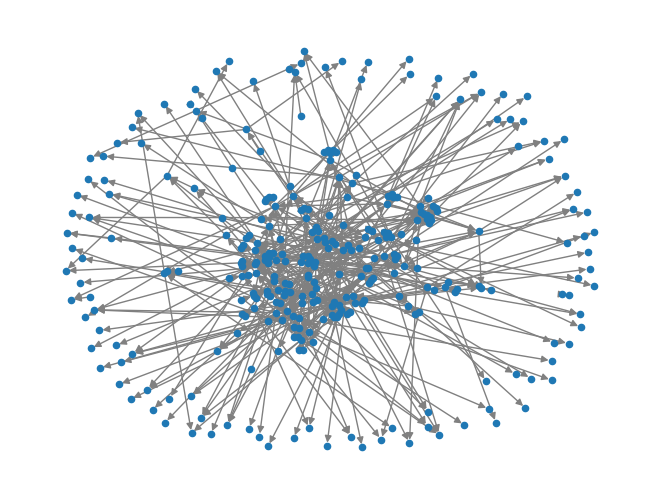

In [ ]:
# FETCH da API
import requests

url = input('INSIRA A URL DA API: ')
response = requests.get(url)
data = response.json()

# Criação do grafo e plotagem dos dados
import networkx as nx
import matplotlib.pyplot as plt

grafo_transferencias = nx.DiGraph()

if response.status_code == 200:
    conexoes_jogadores = {}

    for registro in data['transferências']:
        if registro['jogador'] not in conexoes_jogadores.keys():
            conexoes_jogadores[registro['jogador']] = []

        conexoes_jogadores[registro['jogador']].append(registro)
        grafo_transferencias.add_edge(registro['de'], registro['para'], weight=1, transferencias=[]) 

    for jogador, conexoes in  conexoes_jogadores.items():
        for conexao in conexoes:
            grafo_transferencias[conexao['de']][conexao['para']]['transferencias'].append({
                    'data': conexao['data'],
                    'jogador': conexao['jogador'],
                    'valor': conexao['valor'],
                    'id': conexao['id']
                    })
            
            grafo_transferencias[conexao['de']][conexao['para']]['weight'] = len(grafo_transferencias[conexao['de']][conexao['para']]['transferencias'])
 
# Impressão dos vértices e arestas do grafo
print(f'VÉRTICES DO GRAFO: {grafo_transferencias.number_of_nodes()}')
print(f'ARESTAS DO GRAFO: {grafo_transferencias.number_of_edges()}')

layout = nx.spring_layout(grafo_transferencias,k=0.3, scale=30) # Definição do layout usado no grafo

# Desenho do grafo
nx.draw(grafo_transferencias, node_size=20, edge_color='gray', arrowsize=10)
plt.show